In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
data = pd.read_json("/content/drive/MyDrive/Sequential NLP/news/Sarcasm_Headlines_Dataset.json",lines = True)
data.to_csv()

',is_sarcastic,headline,article_link\n0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205\n1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207\n2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html\n3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031\n4,1,mother comes pretty close to using word \'streaming\' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546\n5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-inheritance_us_59230747e4b07617ae4cbe1a\n6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost

In [255]:
data

is_sarcastic  ...                                       article_link
0                 1  ...  https://www.theonion.com/thirtysomething-scien...
1                 0  ...  https://www.huffingtonpost.com/entry/donna-edw...
2                 0  ...  https://www.huffingtonpost.com/entry/eat-your-...
3                 1  ...  https://local.theonion.com/inclement-weather-p...
4                 1  ...  https://www.theonion.com/mother-comes-pretty-c...
...             ...  ...                                                ...
28614             1  ...  https://www.theonion.com/jews-to-celebrate-ros...
28615             1  ...  https://local.theonion.com/internal-affairs-in...
28616             0  ...  https://www.huffingtonpost.com/entry/andrew-ah...
28617             1  ...  https://www.theonion.com/mars-probe-destroyed-...
28618             1  ...  https://www.theonion.com/dad-clarifies-this-no...

[28619 rows x 3 columns]

In [256]:
data.describe(include="all")

is_sarcastic  ...                                       article_link
count   28619.000000  ...                                              28619
unique           NaN  ...                                              28617
top              NaN  ...  https://politics.theonion.com/nation-not-sure-...
freq             NaN  ...                                                  2
mean        0.476397  ...                                                NaN
std         0.499451  ...                                                NaN
min         0.000000  ...                                                NaN
25%         0.000000  ...                                                NaN
50%         0.000000  ...                                                NaN
75%         1.000000  ...                                                NaN
max         1.000000  ...                                                NaN

[11 rows x 3 columns]

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [258]:
data.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

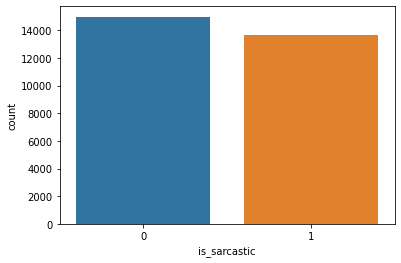

In [259]:
sns.countplot(data=data,x="is_sarcastic")

In [260]:
import re
import string
def formattedData(col_data):
  col_data = re.sub(r'\d+', '', col_data)
  col_data = "".join([char for char in col_data if char not in string.punctuation])
  return col_data

In [261]:
data['headline']=data['headline'].apply(formattedData)

In [262]:
data.drop('article_link',inplace=True,axis=1)

In [263]:
sentence_length = [len(text) for text in data['headline']]

In [264]:
sentence_length

[61,
 77,
 47,
 52,
 59,
 20,
 41,
 86,
 73,
 34,
 73,
 50,
 51,
 106,
 50,
 75,
 54,
 45,
 40,
 65,
 65,
 82,
 18,
 46,
 67,
 67,
 38,
 50,
 66,
 60,
 38,
 26,
 30,
 98,
 61,
 48,
 102,
 58,
 82,
 49,
 46,
 71,
 63,
 65,
 68,
 54,
 57,
 55,
 70,
 47,
 74,
 51,
 84,
 19,
 92,
 52,
 64,
 49,
 71,
 50,
 87,
 33,
 45,
 77,
 45,
 79,
 46,
 51,
 71,
 85,
 43,
 51,
 66,
 47,
 90,
 76,
 41,
 33,
 42,
 95,
 74,
 78,
 88,
 67,
 73,
 63,
 45,
 81,
 80,
 81,
 62,
 62,
 24,
 90,
 48,
 56,
 118,
 70,
 64,
 39,
 78,
 49,
 66,
 88,
 34,
 118,
 59,
 55,
 57,
 48,
 50,
 65,
 58,
 49,
 51,
 58,
 51,
 90,
 75,
 46,
 63,
 32,
 52,
 32,
 65,
 71,
 87,
 61,
 82,
 57,
 83,
 41,
 65,
 71,
 60,
 102,
 69,
 84,
 64,
 39,
 76,
 58,
 41,
 98,
 107,
 68,
 69,
 64,
 61,
 71,
 40,
 84,
 50,
 83,
 75,
 76,
 42,
 79,
 49,
 34,
 47,
 30,
 102,
 61,
 73,
 34,
 41,
 64,
 44,
 49,
 44,
 90,
 22,
 55,
 57,
 48,
 74,
 80,
 56,
 85,
 45,
 41,
 101,
 134,
 70,
 54,
 91,
 32,
 116,
 39,
 57,
 86,
 61,
 19,
 64,
 89,
 69,
 55,


In [265]:
num_features = 10000
embedding = 300

In [266]:
tokenizer = Tokenizer(num_words=num_features)
tokenizer.fit_on_texts(data['headline'])
tokenizer.num_words

10000

In [267]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = max([len(col_data) for col_data in data['headline']]))
X

array([[   0,    0,    0, ...,    2,  660, 1120],
       [   0,    0,    0, ..., 1636, 2074, 1707],
       [   0,    0,    0, ...,   34,  597, 1426],
       ...,
       [   0,    0,    0, ...,    6,  730, 1857],
       [   0,    0,    0, ...,   18,  834, 6094],
       [   0,    0,    0, ...,    6,  262,  170]], dtype=int32)

In [268]:
y = np.asarray(data['is_sarcastic'])
y

array([1, 0, 0, ..., 0, 1, 1])

In [269]:
vocabulary_size=len(tokenizer.word_index)
vocabulary_size

28846

In [270]:
glove_file =  "/content/drive/MyDrive/Sequential NLP/glove.6B.50d.txt"

In [271]:
embeddings = {}
for o in open(glove_file):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd

In [272]:
embedding_matrix = np.zeros((10001, 50))

for word, i in list(tokenizer.word_index.items())[: num_features - 1]:
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [273]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

tf.keras.backend.clear_session()
model = Sequential()

model.add(Embedding(10001, 50, weights=[embedding_matrix], input_length=254,  trainable=False))
model.add(Bidirectional(LSTM(units=20)))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(20))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 254, 50)           500050    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                11360     
_________________________________________________________________
dense (Dense)                (None, 40)                1640      
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 513,891
Trainable params: 13,841
Non-trainable params: 500,050
_____________________________________________

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model.fit(X_train,y_train,batch_size=128, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
179/179 [==============================] - 153s 834ms/step - loss: 0.6105 - accuracy: 0.6586 - val_loss: 0.5279 - val_accuracy: 0.7400
Epoch 2/10
179/179 [==============================] - 147s 821ms/step - loss: 0.4807 - accuracy: 0.7731 - val_loss: 0.4485 - val_accuracy: 0.7916
Epoch 3/10
179/179 [==============================] - 147s 819ms/step - loss: 0.4248 - accuracy: 0.8065 - val_loss: 0.4210 - val_accuracy: 0.8068
Epoch 4/10
179/179 [==============================] - 147s 820ms/step - loss: 0.4012 - accuracy: 0.8176 - val_loss: 0.4092 - val_accuracy: 0.8120
Epoch 5/10
179/179 [==============================] - 147s 822ms/step - loss: 0.3802 - accuracy: 0.8311 - val_loss: 0.4041 - val_accuracy: 0.8176
Epoch 6/10
179/179 [==============================] - 146s 819ms/step - loss: 0.3706 - accuracy: 0.8378 - val_loss: 0.3923 - val_accuracy: 0.8242
Epoch 7/10
179/179 [==============================] - 146s 815ms/step - loss: 0.3534 - accuracy: 0.8450 - val_loss: 0.3911 -

In [275]:
test_prediction = model.predict(np.array(X_test))